In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)


# Pandas is a popular library for the Python. It provides easy-to-use data structures, such as DataFrame and Series, along with a variety of functions for reading, writing, and manipulating structured data.

In [2]:


# Creating a DataFrame object
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22],
        'City': ['New York', 'San Francisco', 'Los Angeles']}

df = pd.DataFrame(data)

# 'df' is now an object of the DataFrame class


In [3]:
df.shape

(3, 3)

In [4]:
print(df)

      Name  Age           City
0    Alice   25       New York
1      Bob   30  San Francisco
2  Charlie   22    Los Angeles


# **The DataSet upload**

In [5]:
df = pd.read_csv("./Solar panel.csv")

In [6]:
# Get the size of the original DataFrame
rows_original, columns_original = df.shape

# Display the size of the original DataFrame
print(f"The size of df is {rows_original} rows x {columns_original} columns.")


The size of df is 79 rows x 9 columns.


# Display your dataframe

In [7]:
df

,Time,Temp,Wind speed,Humidity,Air pressure,Pmax,Imax,Umax,FF_raw
0,5.000000,28.000000,15.000000,21.000000,1001.000000,0.17,0.081,2.778,0.764
1,5.166667,28.166667,14.666667,20.833333,1001.166667,0.34,0.149,2.908,0.775
2,5.333333,28.333333,14.333333,20.666667,1001.333333,0.51,0.220,2.964,0.782
3,5.500000,28.500000,14.000000,20.500000,1001.500000,0.69,0.294,3.037,0.778
4,5.666667,28.666667,13.666667,20.333333,1001.666667,0.89,0.364,3.077,0.790
...,...,...,...,...,...,...,...,...,...
74,17.333333,39.666667,24.666667,10.000000,1000.000000,1.48,0.630,3.057,0.767
75,17.500000,39.500000,24.000000,10.000000,1000.000000,1.18,0.508,3.026,0.769
76,17.666667,39.333333,23.333333,10.000000,1000.000000,0.95,0.410,3.000,0.773
77,17.833333,39.166667,22.666667,10.000000,1000.000000,0.74,0.325,2.966,0.769


# **Check for missing values in your DataFrame using the isnull() function.**

In [8]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)


Time            0
Temp            0
Wind speed      0
Humidity        0
Air pressure    0
Pmax            0
Imax            0
Umax            0
FF_raw          0
dtype: int64


# To check for outliers in your DataFrame, you can use various methods. One common method is to use the Interquartile Range (IQR).

In [9]:


# Assuming df is your DataFrame
# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64']).columns

# Calculate the IQR for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers
threshold = 1.5

# Create a boolean mask for outliers
outliers_mask = ((df[numerical_columns] < (Q1 - threshold * IQR)) | (df[numerical_columns] > (Q3 + threshold * IQR)))

# Display rows with outliers
outliers = df[outliers_mask.any(axis=1)]
print(outliers)


         Time       Temp  Wind speed   Humidity  Air pressure   Pmax   Imax  \
0    5.000000  28.000000   15.000000  21.000000   1001.000000   0.17  0.081   
1    5.166667  28.166667   14.666667  20.833333   1001.166667   0.34  0.149   
2    5.333333  28.333333   14.333333  20.666667   1001.333333   0.51  0.220   
3    5.500000  28.500000   14.000000  20.500000   1001.500000   0.69  0.294   
4    5.666667  28.666667   13.666667  20.333333   1001.666667   0.89  0.364   
5    5.833333  28.833333   13.333333  20.166667   1001.833333   1.21  0.489   
6    6.000000  29.000000   13.000000  20.000000   1002.000000   1.63  0.660   
7    6.166667  29.500000   13.666667  19.166667   1002.000000   2.19  0.872   
8    6.333333  30.000000   14.333333  18.333333   1002.000000   2.84  1.126   
9    6.500000  30.500000   15.000000  17.500000   1002.000000   3.58  1.415   
10   6.666667  31.000000   15.666667  16.666667   1002.000000   4.34  1.722   
11   6.833333  31.500000   16.333333  15.833333   10

# Remove outliers from your DataFrame

In [10]:
# Remove outliers from the original DataFrame
df_no_outliers = df[~outliers_mask.any(axis=1)]

# Display the new DataFrame without outliers
print(df_no_outliers)


         Time       Temp  Wind speed   Humidity  Air pressure   Pmax   Imax  \
13   7.166667  32.500000   17.333333  14.333333   1002.000000   6.78  2.732   
14   7.333333  33.000000   17.666667  13.666667   1002.000000   7.61  3.078   
15   7.500000  33.500000   18.000000  13.000000   1002.000000   8.40  3.430   
16   7.666667  34.000000   18.333333  12.333333   1002.000000   9.18  3.765   
17   7.833333  34.500000   18.666667  11.666667   1002.000000   9.95  4.102   
18   8.000000  35.000000   19.000000  11.000000   1002.000000  10.61  4.430   
19   8.166667  35.500000   19.000000  10.500000   1002.000000  11.21  4.743   
20   8.333333  36.000000   19.000000  10.000000   1002.000000  11.80  5.063   
21   8.500000  36.500000   19.000000   9.500000   1002.000000  12.34  5.346   
22   8.666667  37.000000   19.000000   9.000000   1002.000000  12.87  5.625   
23   8.833333  37.500000   19.000000   8.500000   1002.000000  13.41  5.912   
24   9.000000  38.000000   19.000000   8.000000   10

In [11]:
# Get the size of the DataFrame without outliers
rows, columns = df_no_outliers.shape

# Display the size of the DataFrame
print(f"The size of df_no_outliers is {rows} rows x {columns} columns.")


The size of df_no_outliers is 54 rows x 9 columns.


# You can use Min-Max Scaling to normalize the data to the range [0, 1]

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

# Display the normalized DataFrame
print(df_normalized)


        Time      Temp  Wind speed  Humidity  Air pressure      Pmax  \
0   0.000000  0.000000    0.000000  1.000000      1.000000  0.284307   
1   0.016949  0.047619    0.019231  0.909091      1.000000  0.338805   
2   0.033898  0.095238    0.038462  0.818182      1.000000  0.390676   
3   0.050847  0.142857    0.057692  0.727273      1.000000  0.441891   
4   0.067797  0.190476    0.076923  0.636364      1.000000  0.492449   
5   0.084746  0.238095    0.096154  0.545455      1.000000  0.535785   
6   0.101695  0.285714    0.096154  0.477273      1.000000  0.575181   
7   0.118644  0.333333    0.096154  0.409091      1.000000  0.613920   
8   0.135593  0.380952    0.096154  0.340909      1.000000  0.649376   
9   0.152542  0.428571    0.096154  0.272727      1.000000  0.684176   
10  0.169492  0.476190    0.096154  0.204545      1.000000  0.719632   
11  0.186441  0.523810    0.096154  0.136364      1.000000  0.753119   
12  0.203390  0.587302    0.096154  0.113636      1.000000  0.77

# Single figure with separate boxplots for each variable in the normalized DataFrame

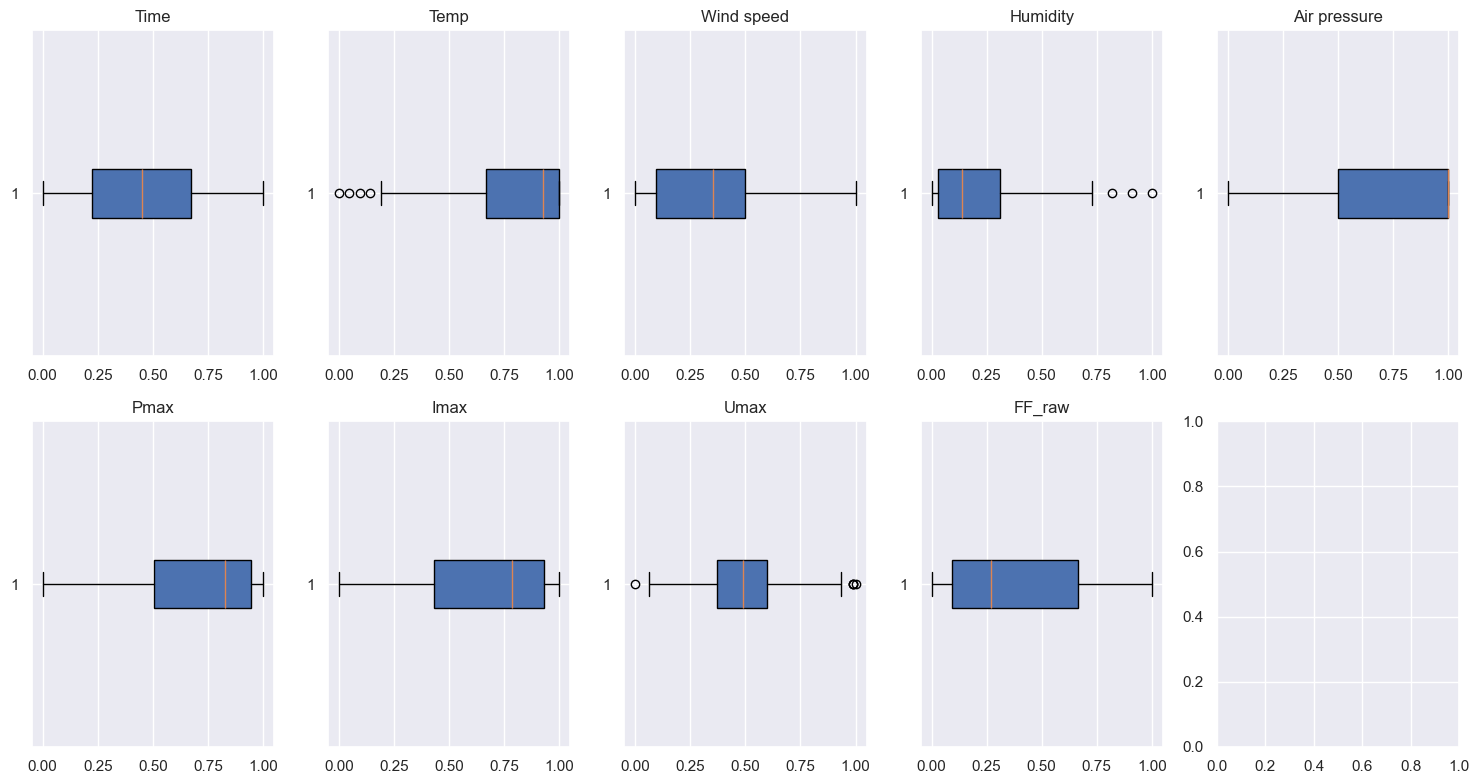

In [13]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Loop through each column and create a boxplot in the corresponding subplot
for i, column in enumerate(df_normalized.columns):
    axes[i].boxplot(df_normalized[column], vert=False, patch_artist=True)
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# **separate boxplots for each variable**

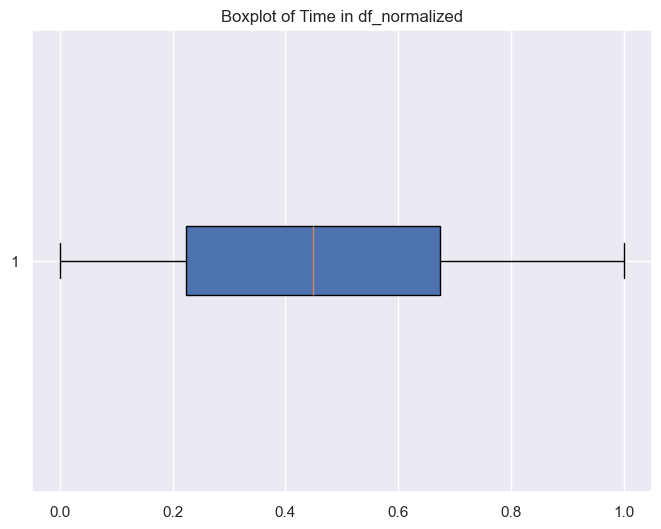

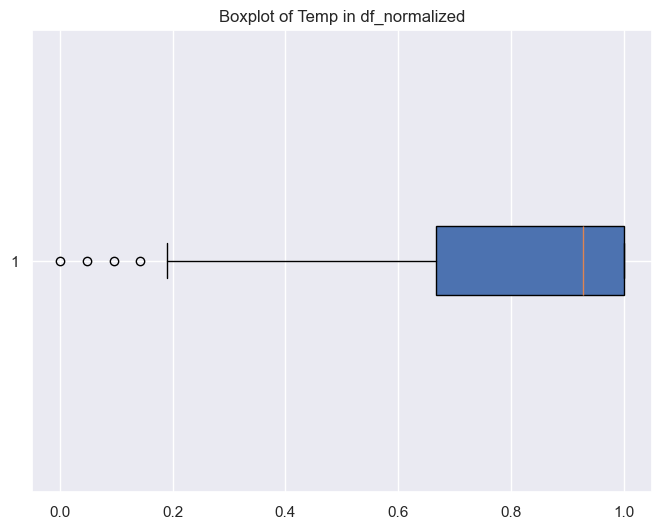

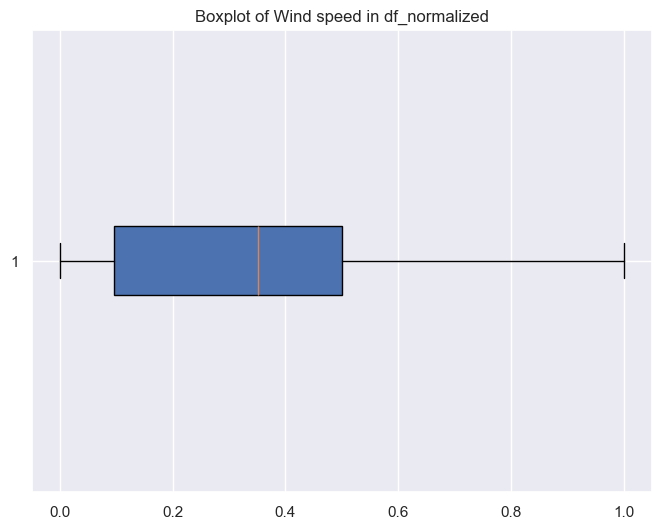

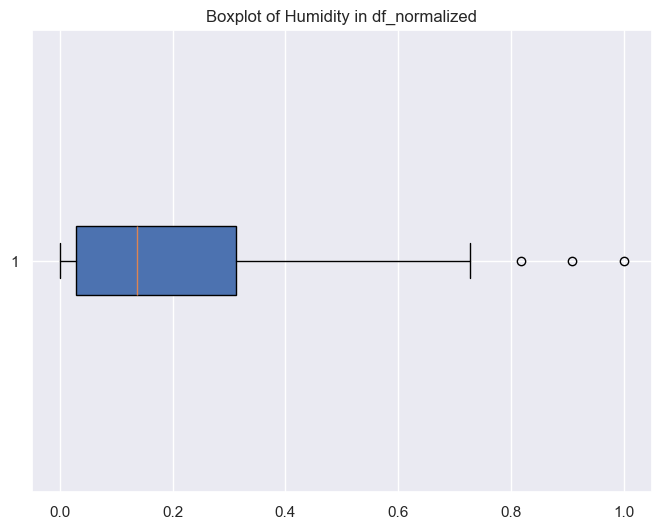

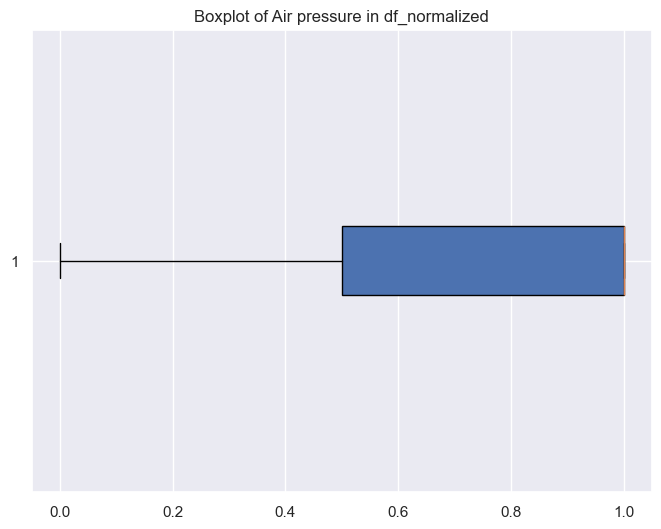

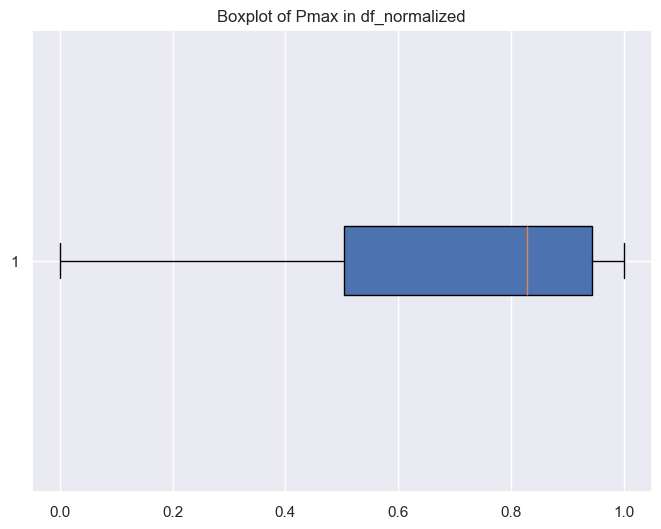

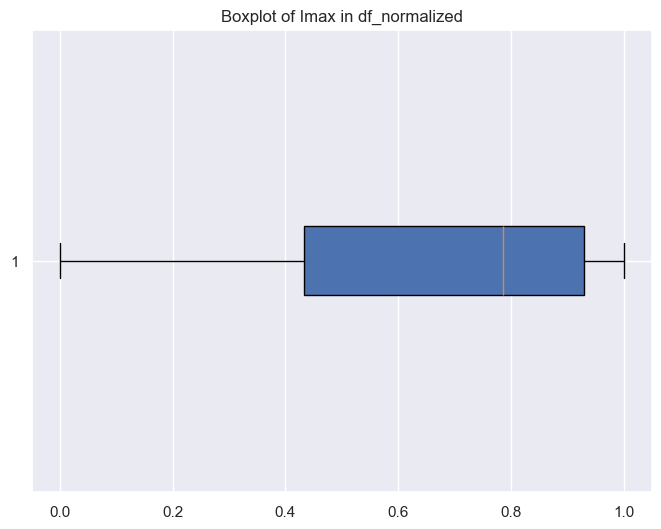

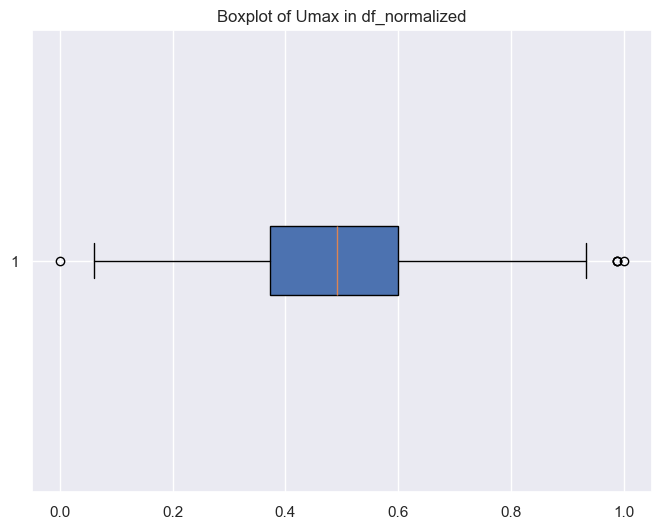

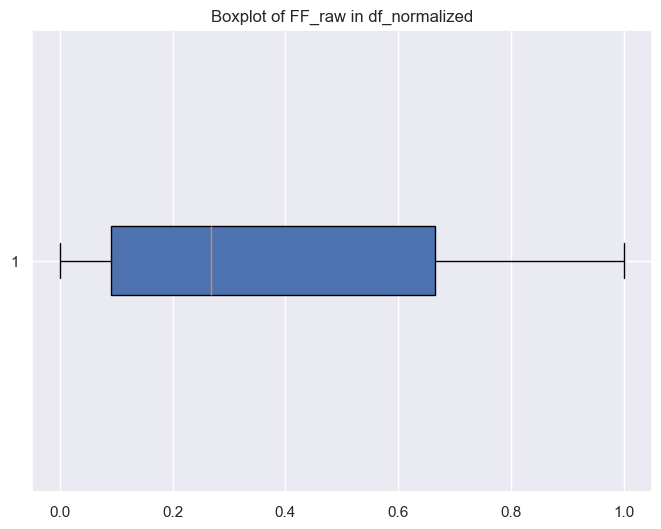

In [14]:
import matplotlib.pyplot as plt

# Create separate boxplots for each variable
for column in df_normalized.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_normalized[column], vert=False, patch_artist=True)
    plt.title(f'Boxplot of {column} in df_normalized')
    plt.show()


# **Be careful for naming renaming your dataframe**

In [15]:
df_no_outliers=df_normalized

# check for correlations, and gain insights into the data

In [16]:
# Example: correlation between 'Umax' and 'Temp'
correlation_Umax_Temp = df_no_outliers['Umax'].corr(df_no_outliers['Temp'])
print(f"Correlation between 'Umax' and 'Temp': {correlation_Umax_Temp:.2f}")


Correlation between 'Umax' and 'Temp': -0.71


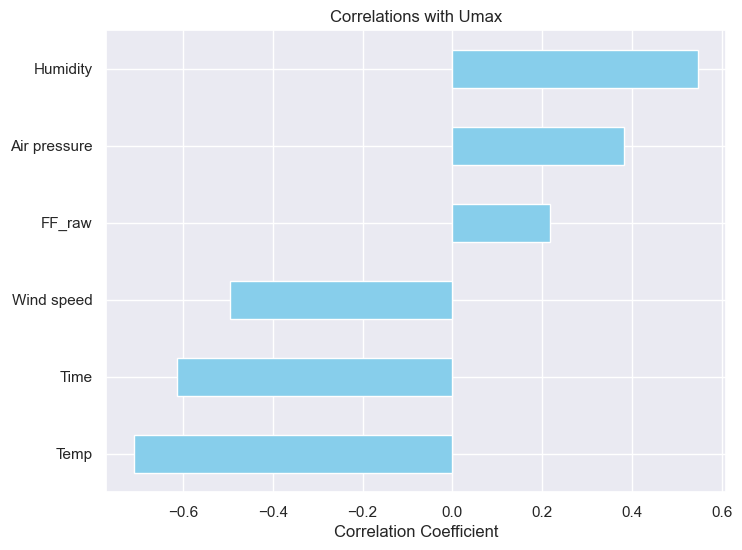

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations between 'Umax' and other variables
correlations_umax = df_no_outliers.drop(['Imax', 'Pmax'], axis=1).corr()['Umax']

# Plot the correlations
plt.figure(figsize=(8, 6))
correlations_umax.drop('Umax').sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlations with Umax')
plt.xlabel('Correlation Coefficient')
plt.show()


In [18]:
df_no_outliers_iqr=df_no_outliers
df_no_outliers_iqr.shape

(54, 9)

In [19]:
pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/9f/1f/a1fc89e48706b20a22b60f3a62b5bdbe7d8bc7dcd8353abcebe66a2bee21/catboost-1.2.2-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ------------------------ ------------- 30.7/47.0 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 471.8 kB/s eta 0:00:00
  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.0 MB 2.2 MB/s eta 0:00:46
   


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\bilker\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
from catboost import CatBoostRegressor

# TTTTRR

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Assuming df_no_outliers is your preprocessed DataFrame without outliers

# Exclude 'Umax', 'Pmax', 'Imax', 'Day', and 'FF_raw' from features
features = df_no_outliers.drop(['Umax', 'Pmax', 'Imax', 'Day', 'FF_raw','Time'], axis=1)
target = df_no_outliers['Umax']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Support Vector Machines
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# LightGBM
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# CatBoost
catboost_model = CatBoostRegressor(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'XGBoost', 'LightGBM', 'CatBoost'],
    'MSE': [mse_rf, mse_svm, mse_xgb, mse_lgbm, mse_catboost],
    'MAE': [mae_rf, mae_svm, mae_xgb, mae_lgbm, mae_catboost],
    'R-squared': [r2_rf, r2_svm, r2_xgb, r2_lgbm, r2_catboost]
})

# Display the results
print(results_df)


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
results_df

,Model,MSE,MAE,R-squared
0,Random Forest,0.000339,0.012883,0.952559
1,SVM,0.006744,0.065154,0.054960
2,XGBoost,0.000360,0.013270,0.949524
3,LightGBM,0.000760,0.016832,0.893568
4,CatBoost,0.000355,0.012195,0.950231


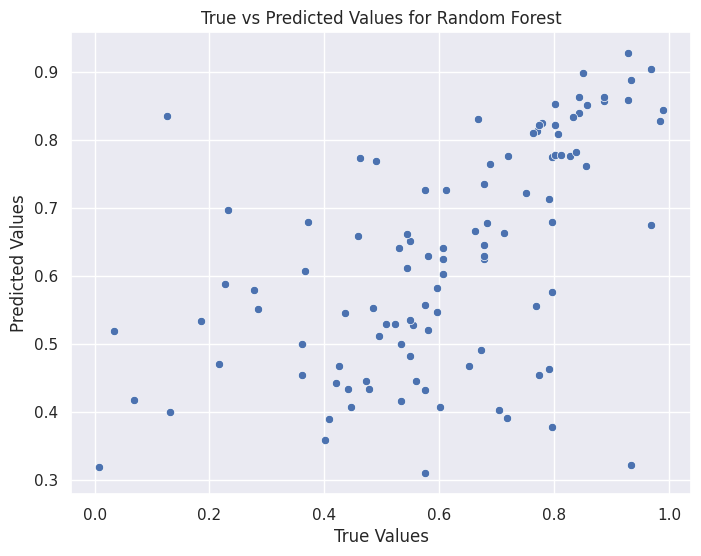

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of true vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for Random Forest')
plt.show()


# TTRRRTTRR

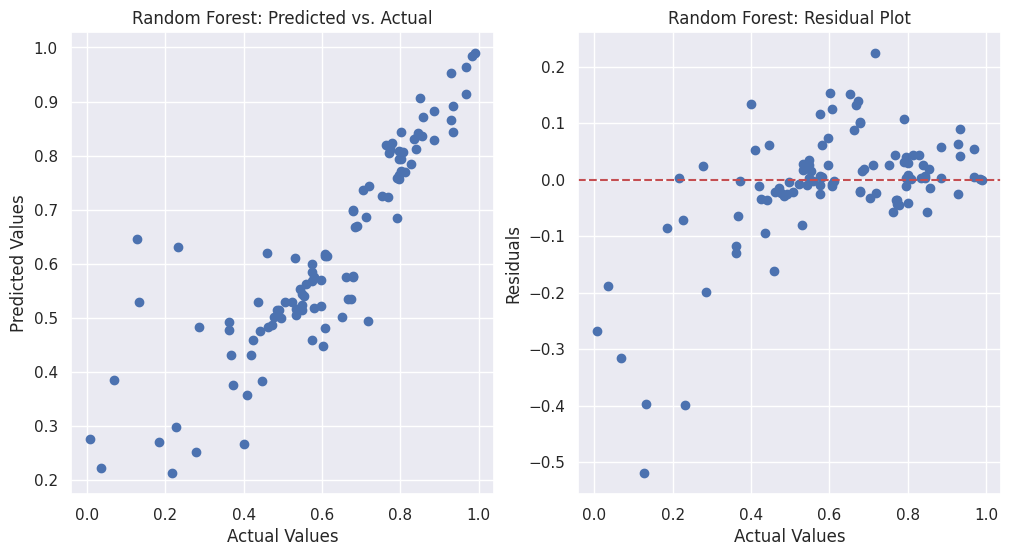

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf)
plt.title('Random Forest: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Residual plot for Random Forest
plt.subplot(1, 2, 2)
residuals_rf = y_test - y_pred_rf
plt.scatter(y_test, residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Random Forest: Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


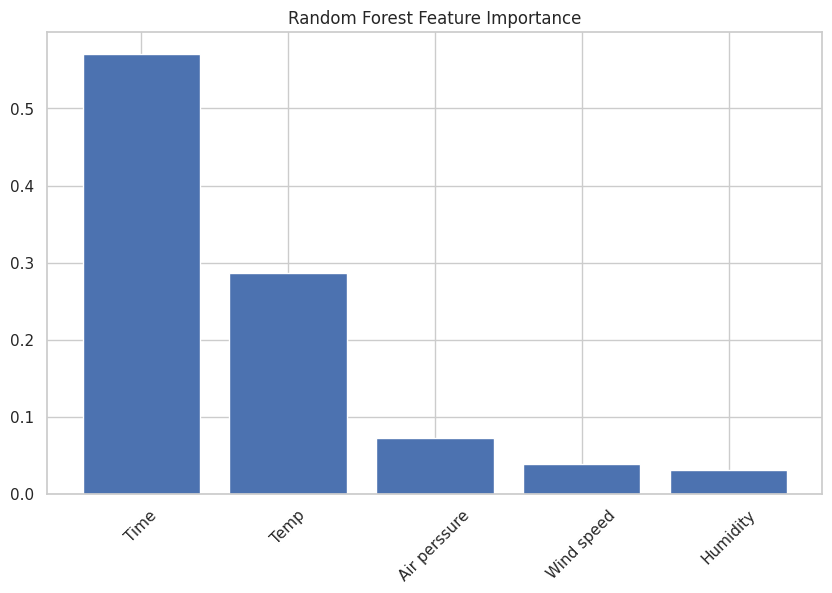

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming 'rf_model' is your trained Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=45)
plt.title('Random Forest Feature Importance')
plt.show()


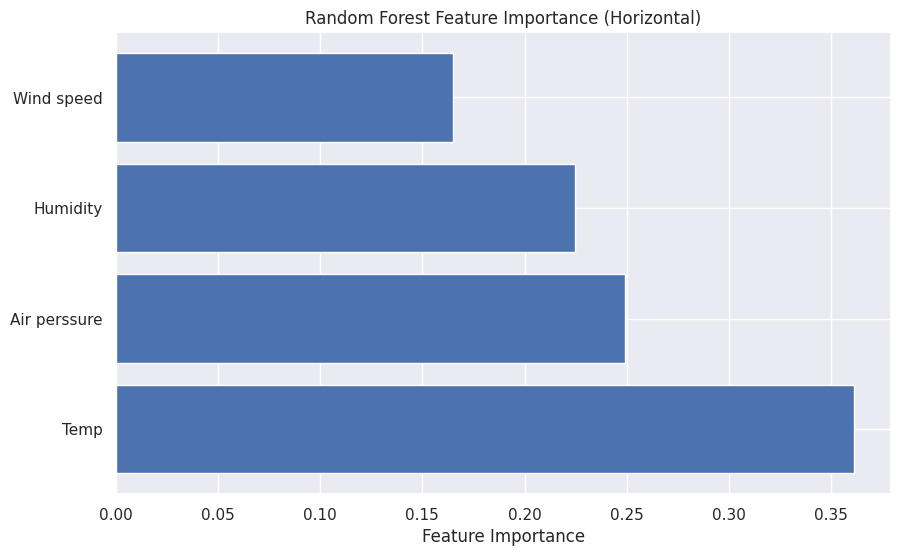

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming 'rf_model' is your trained Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot the feature importances as horizontal bars
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_idx])
plt.yticks(range(len(feature_importances)), feature_names[sorted_idx])
plt.title('Random Forest Feature Importance (Horizontal)')
plt.xlabel('Feature Importance')
plt.show()


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'features' and 'target' are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define your ANN model
ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', max_iter=500, random_state=42)

# Train the ANN model
ann_model.fit(X_train, y_train)

# Predict on the test set
ann_predictions = ann_model.predict(X_test)

# Evaluate the ANN model
ann_mse = mean_squared_error(y_test, ann_predictions)

print(f"ANN Mean Squared Error: {ann_mse}")


ANN Mean Squared Error: 0.1626290165560746


# Fit a Response Surface Model

In [ ]:
dfsrm=df_no_outliers

In [ ]:
dfsrm.describe()

,Day,Time,Pmax,Imax,Umax,FF_raw,Temp,Wind speed,Humidity,Air perssure
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,0.508398,0.509463,0.565072,0.549686,0.621096,0.479629,0.619064,0.422829,0.303239,0.412629
std,0.335164,0.280588,0.311973,0.321033,0.208198,0.304807,0.238961,0.192629,0.254119,0.295837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.272727,0.278825,0.246086,0.487467,0.201550,0.470588,0.301535,0.096154,0.166667
50%,0.500000,0.506494,0.644678,0.603474,0.617414,0.449612,0.647059,0.385965,0.264423,0.333333
75%,0.833333,0.753247,0.852273,0.855002,0.796834,0.798450,0.831933,0.587719,0.454327,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming dfsrm is your preprocessed DataFrame
features = dfsrm[['Wind speed', 'Humidity', 'Air perssure']]
response = dfsrm['Umax']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=0.2, random_state=42)

# Fit a quadratic model
X_train_poly = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_poly).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Umax   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     39.67
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.63e-22
Time:                        19:08:29   Log-Likelihood:                 123.04
No. Observations:                 412   AIC:                            -238.1
Df Residuals:                     408   BIC:                            -222.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4244      0.024     17.765   

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Fitted coefficients from the regression model
const_coef = 0.4244
wind_coef = 0.1800
humidity_coef = 0.0807
pressure_coef = 0.2394

# Define the objective function (negative to convert maximization to minimization)
def objective_function(x):
    wind_speed, humidity, air_pressure = x
    predicted_efficiency = const_coef + wind_coef * wind_speed + humidity_coef * humidity + pressure_coef * air_pressure
    return -predicted_efficiency  # Negative to convert maximization to minimization

# Set optimization bounds for each factor
bounds = [(0, 1), (0, 1), (0, 1)]  # Adjust these based on your specific range

# Initial guess for factor values
initial_guess = [0.5, 0.5, 0.5]  # Adjust based on your specific context

# Perform optimization
result = minimize(objective_function, initial_guess, bounds=bounds)

# Retrieve optimal factor values
optimal_factors = result.x
max_efficiency = -result.fun  # Convert back to maximization

print("Optimal Factor Values:", optimal_factors)
print("Max Solar Panel Efficiency:", max_efficiency)


Optimal Factor Values: [1. 1. 1.]
Max Solar Panel Efficiency: 0.9245000000000001
